## Project on House prices prediction using Various Regression Model

## Problem Statement :  Predict the sales price for each house

In [106]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1. Read Training CSV file

In [107]:
import pandas as pd
df = pd.read_csv('training_set.csv',na_values=['','NA',],keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
  # Performing Basic Data Quality check on Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [109]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [110]:
m = df.isna().sum()
m[m>0]


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [111]:
df.duplicated().sum()

0

### Seperating the X and Y features ( X = all columns excluding Sale price 
### Y = Target Feature (Sale price))

In [112]:
X = df.drop(columns=['Id','SalePrice'])
Y =df[['SalePrice']]

In [113]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [114]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### Seperating Cat and Con Features from X 

In [115]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [116]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [117]:
len(cat)

43

In [118]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [119]:
len(con)

36

### EDA (Univariate, Bivarite) 

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

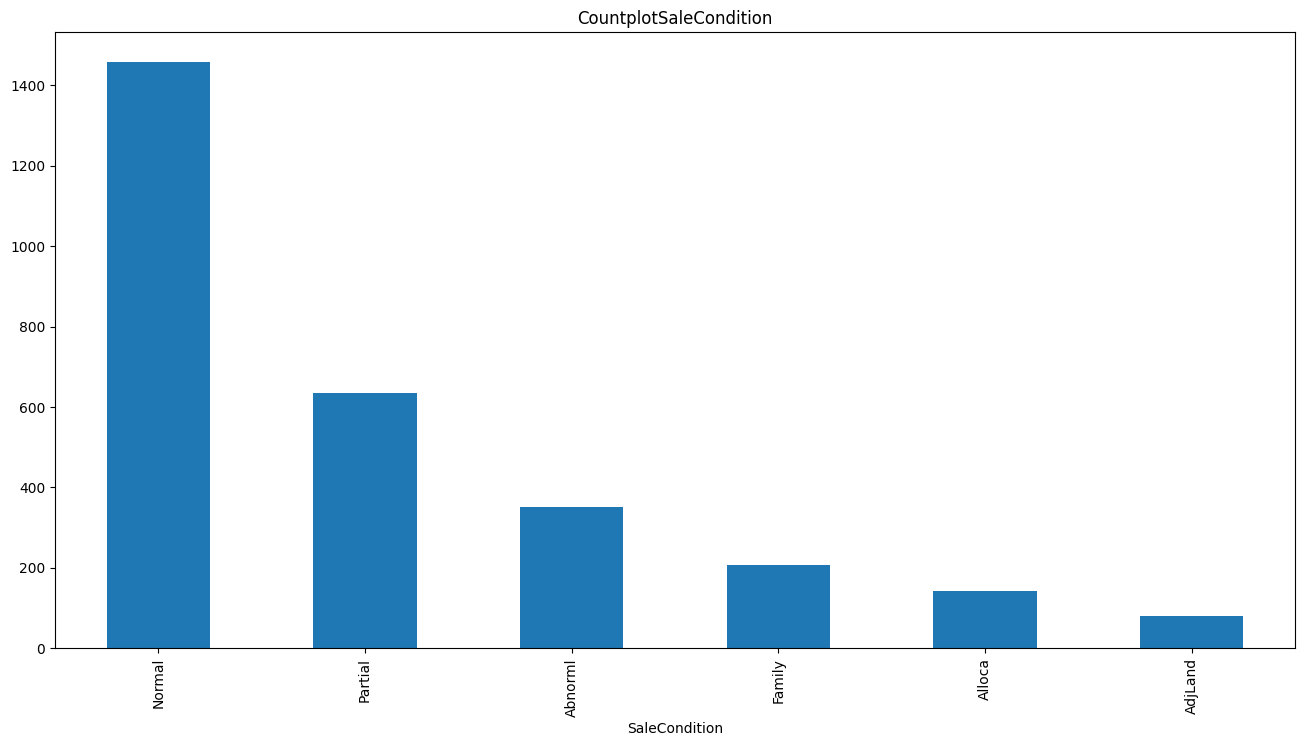

In [121]:
# for Cat features
for i in cat:
    df[i].value_counts().plot(kind='bar',title=f'Countplot{i}',figsize=(16,8))

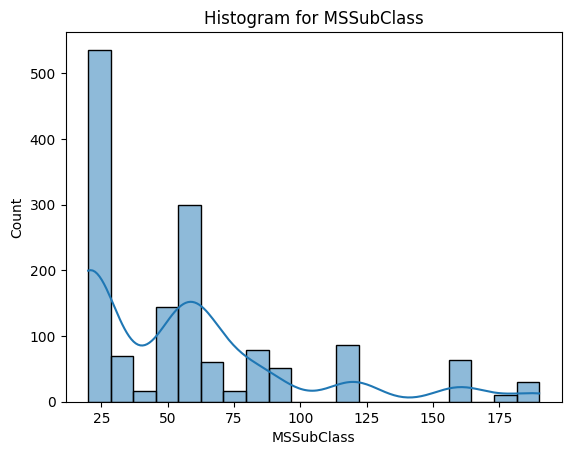

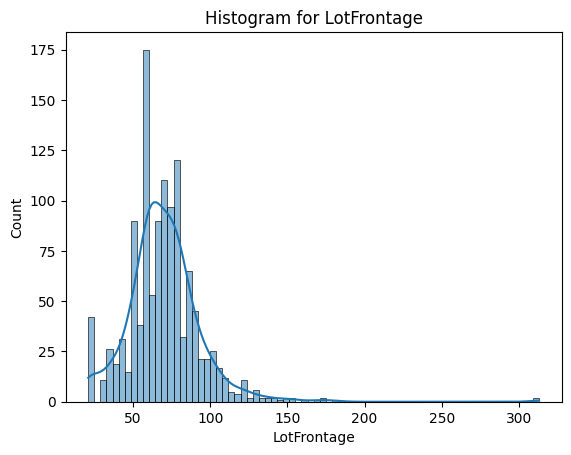

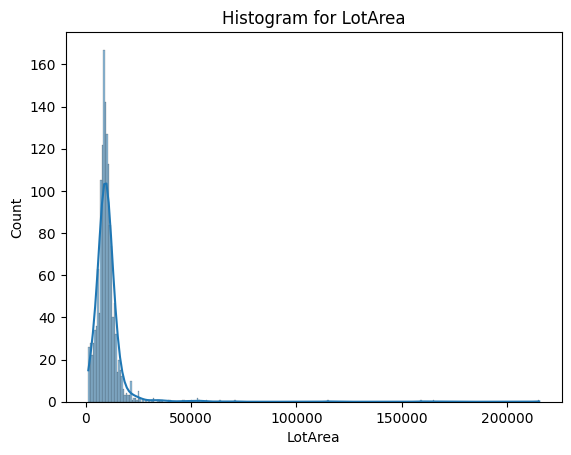

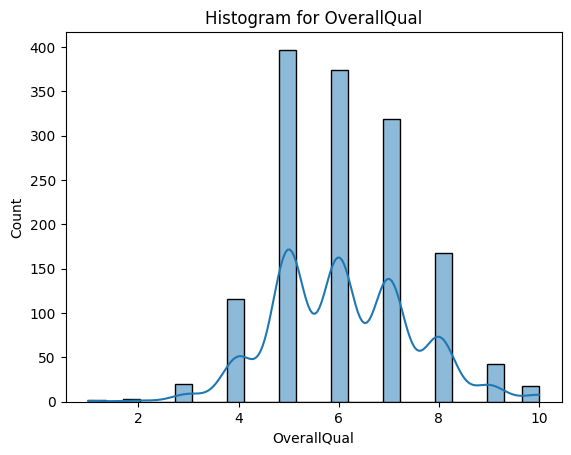

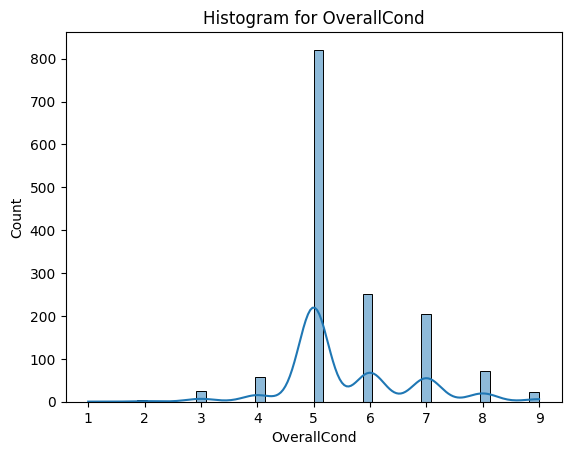

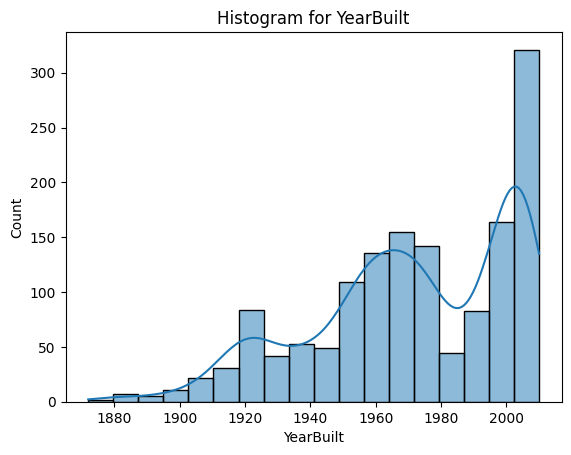

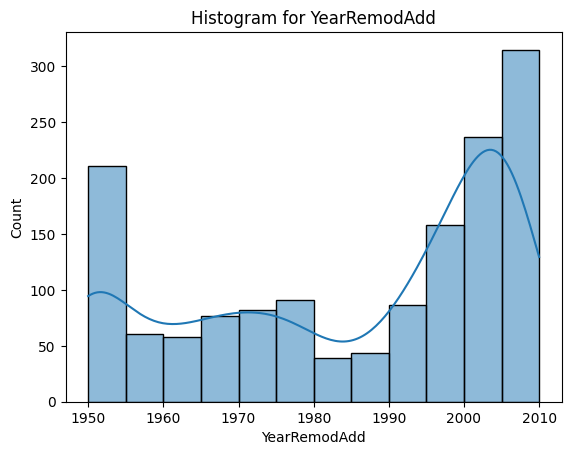

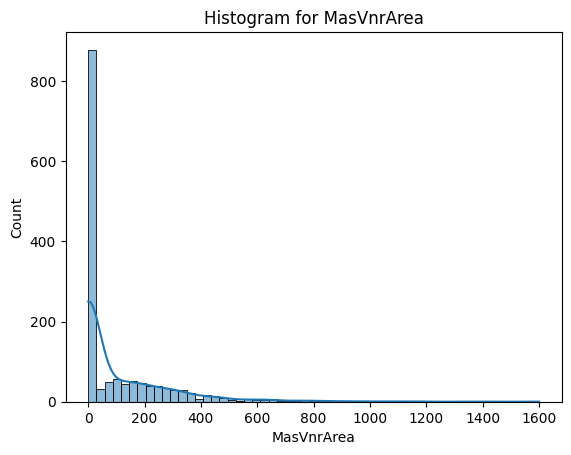

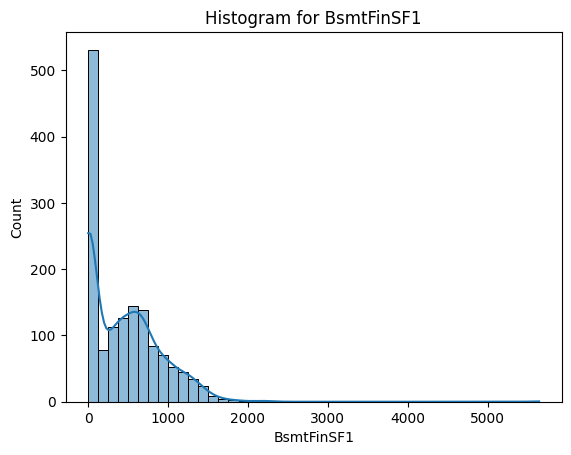

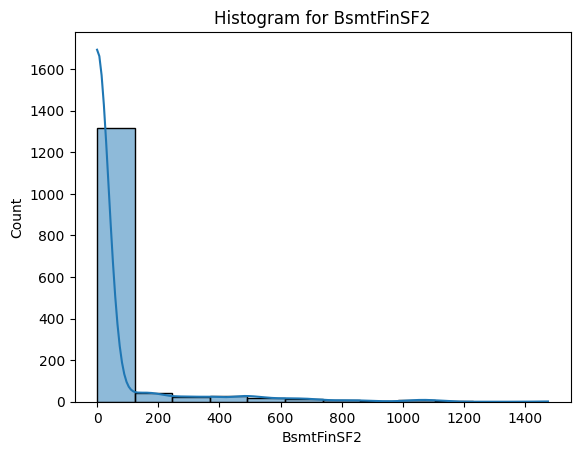

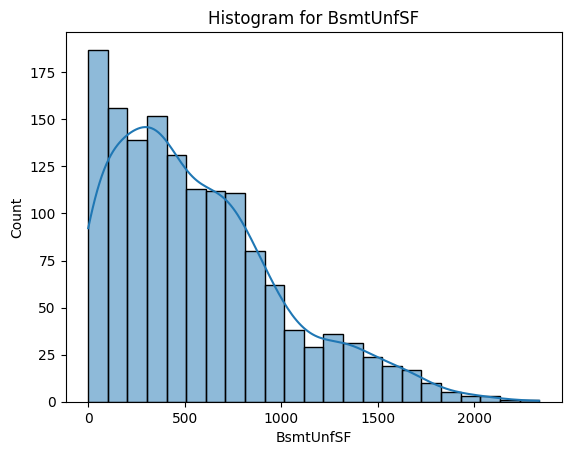

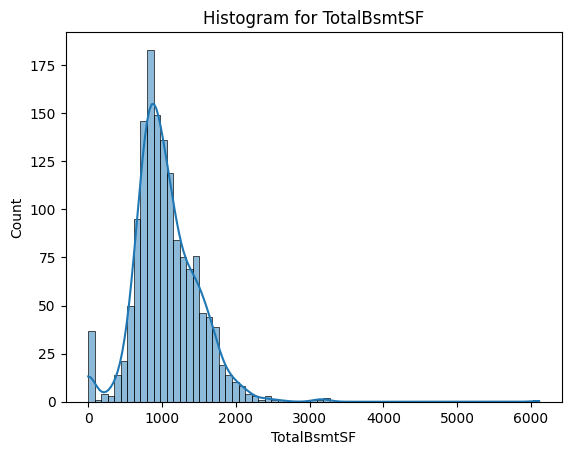

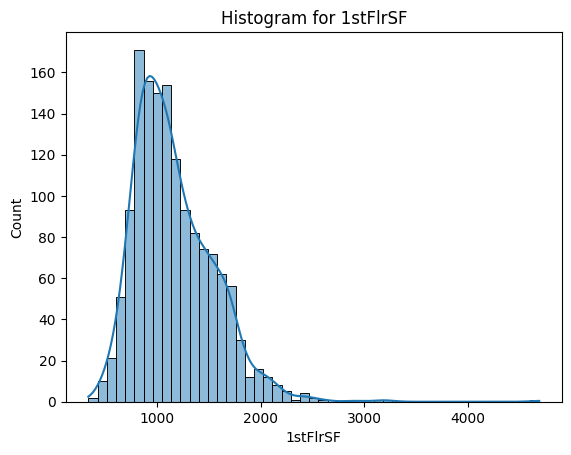

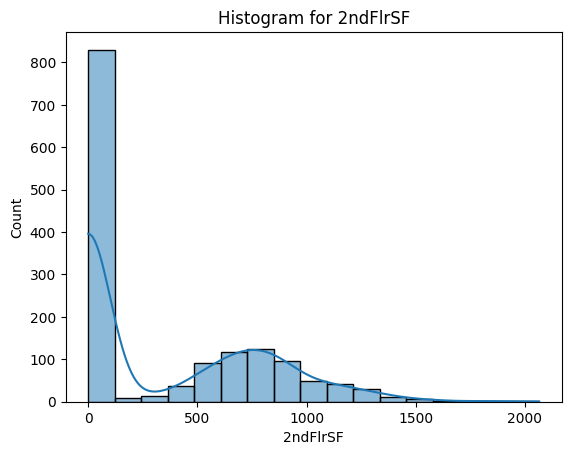

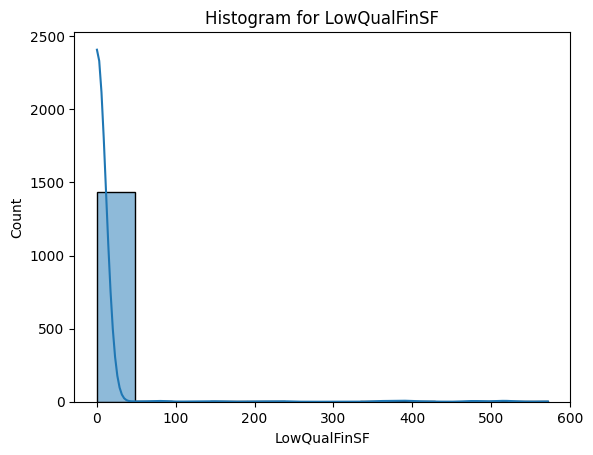

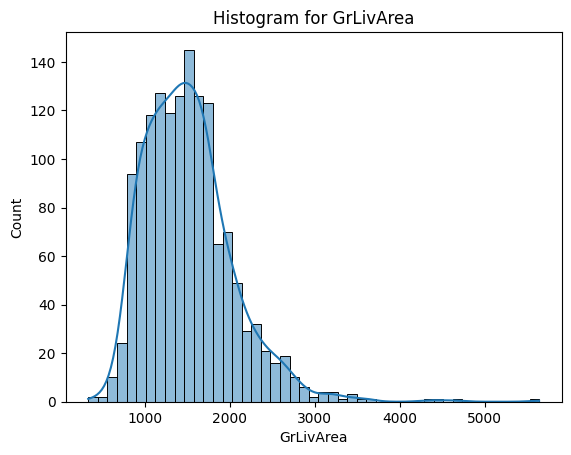

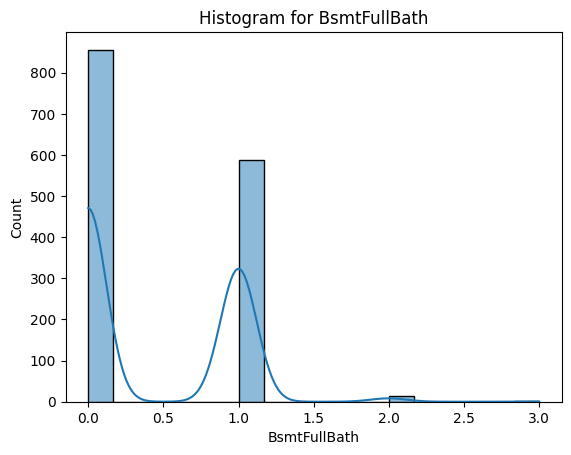

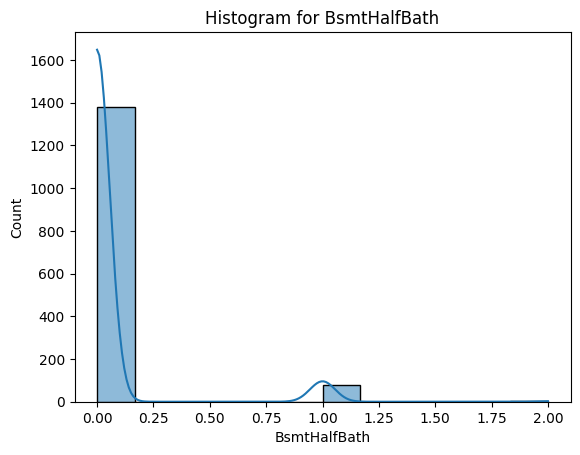

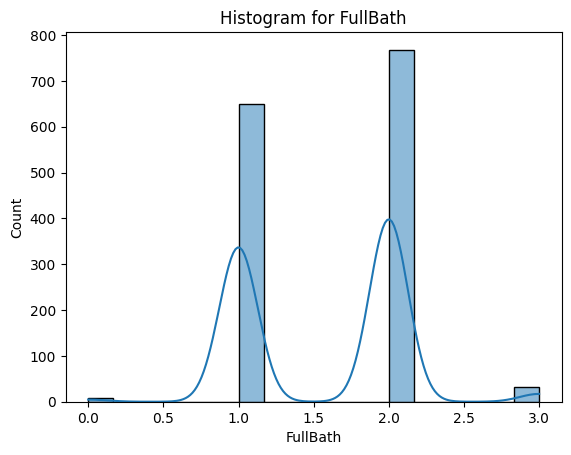

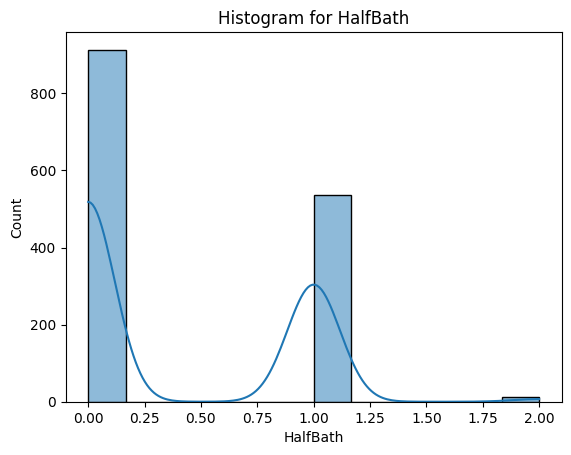

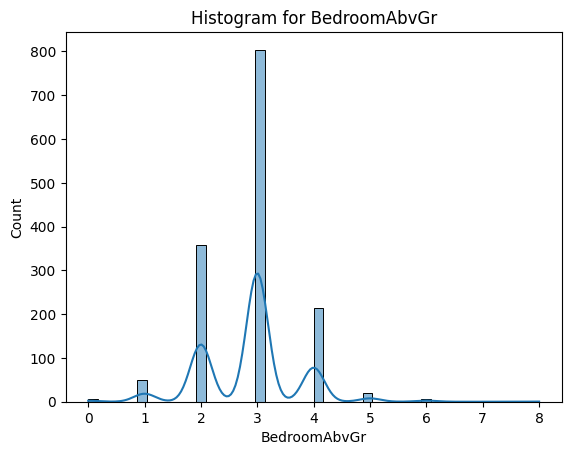

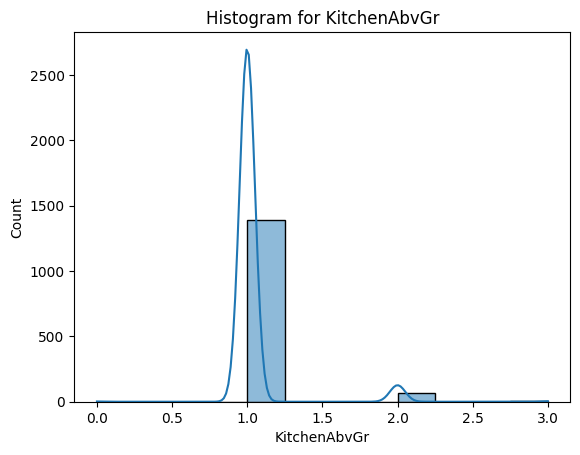

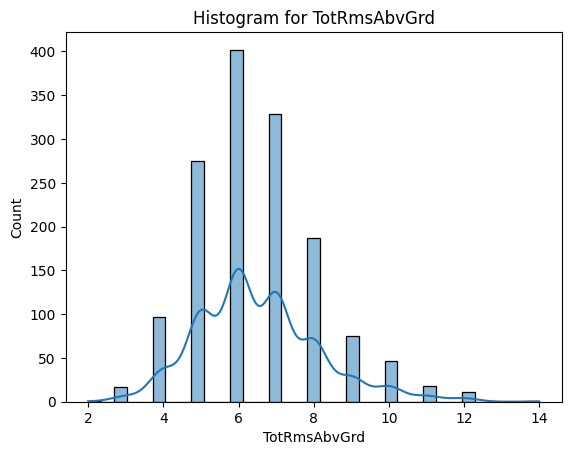

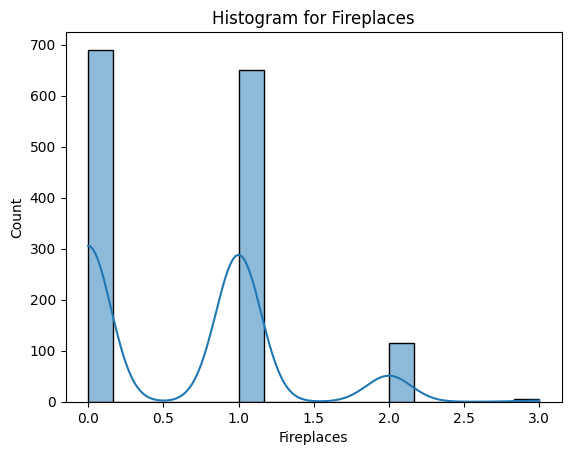

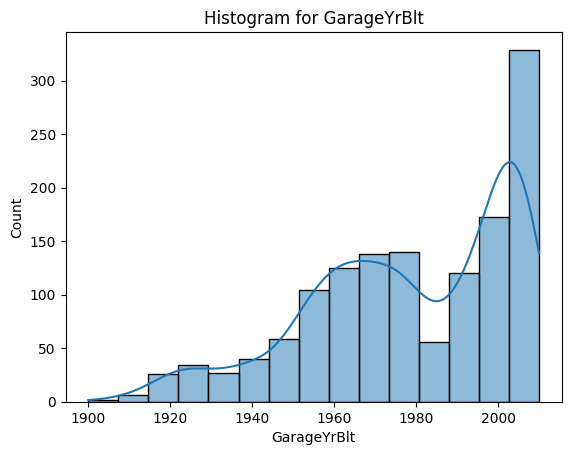

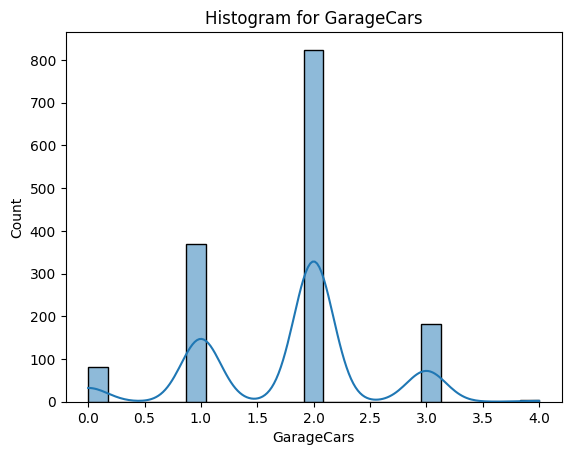

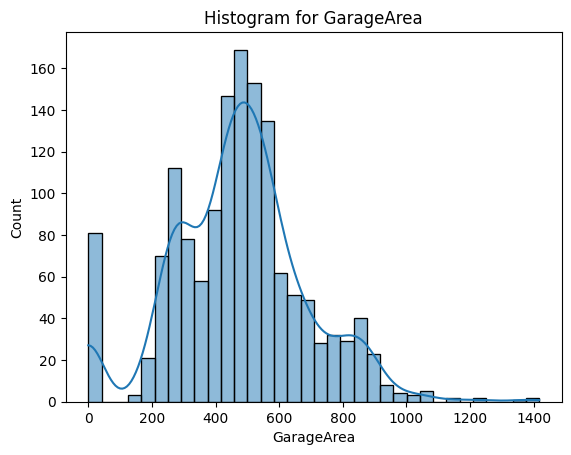

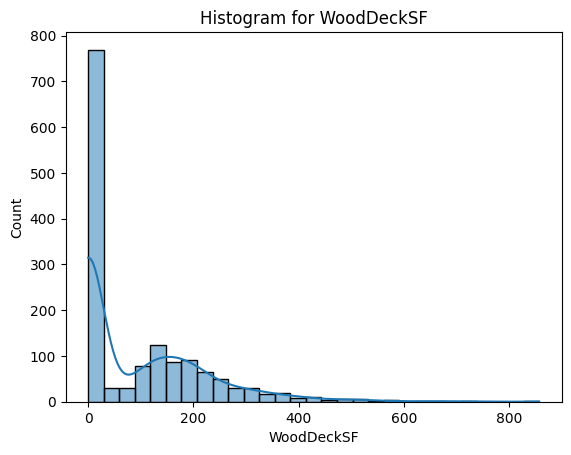

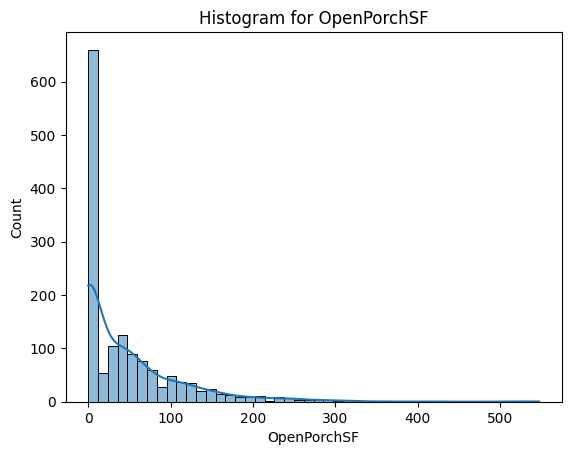

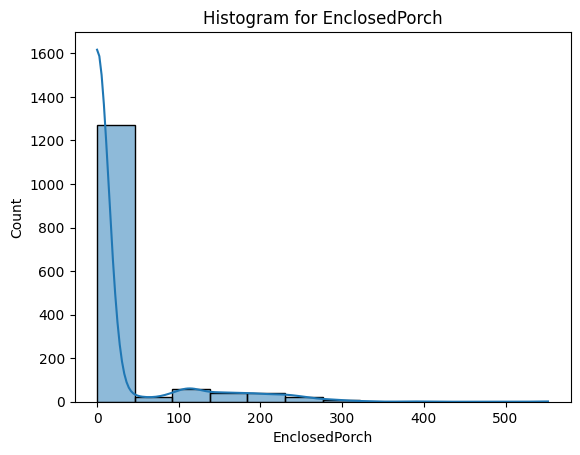

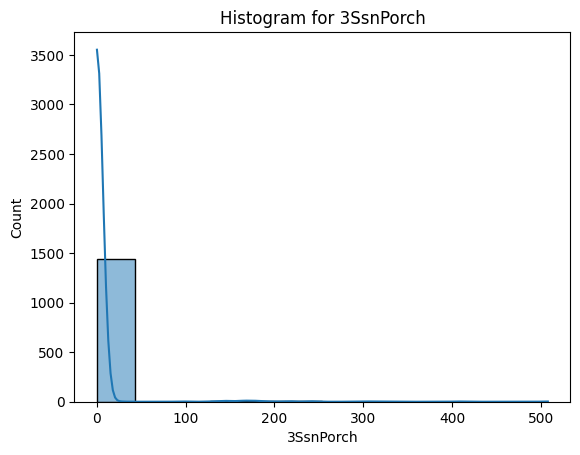

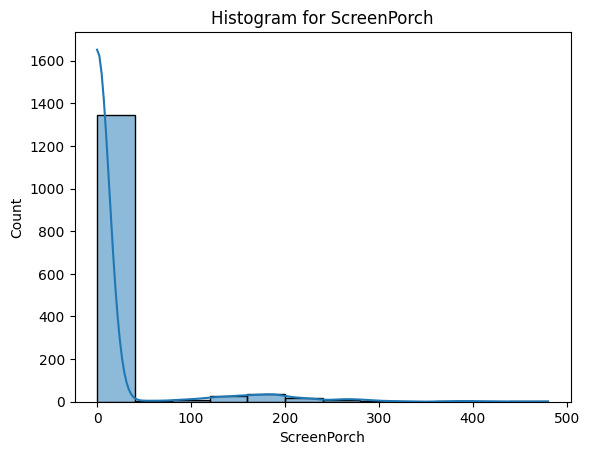

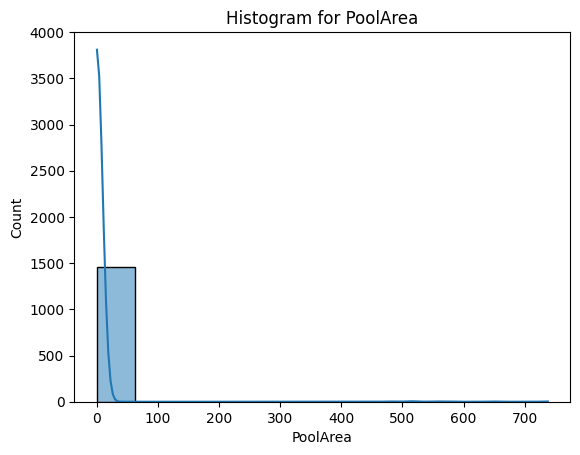

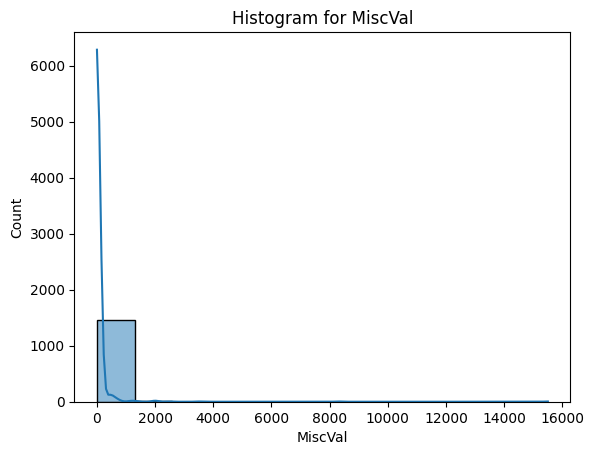

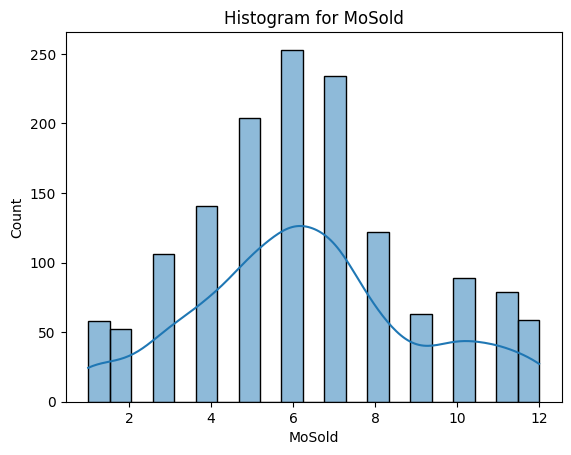

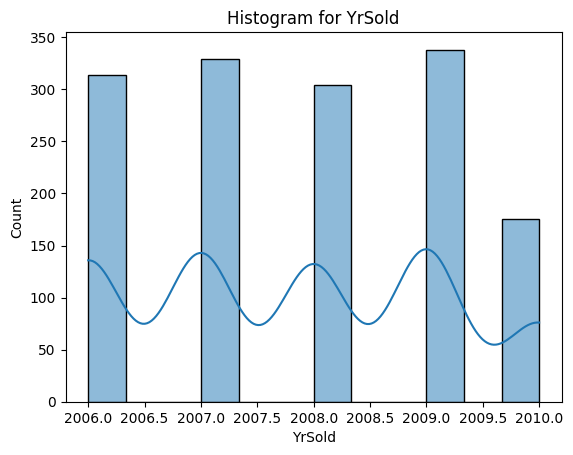

In [122]:
# for con features

for i in con:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

#### Sklearn Pipeline  1. Feature selection (Ordinal Encode) 2. Final Pipeline(OneHotEncoder)

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [124]:
num_pipe1 = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                      ('scaler', StandardScaler())])


cat_pipe1 = Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='NotAvail')),
                      ('ordinal',OrdinalEncoder())])


pre1 = ColumnTransformer([('num',num_pipe1,con),
                          ('cat',cat_pipe1,cat)]).set_output(transform='pandas')

In [125]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [126]:
X_pre =pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


# Features Selection by Forward selection method

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector


In [128]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr,direction='forward')
sel.fit_transform(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold', 'cat__Street',
       'cat__LandContour', 'cat__Utilities', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__HeatingQC', 'cat__KitchenQual',
       'cat__Functional', 'cat__GarageCond', 'cat__PavedDrive',
       'cat__Fence', 'cat__MiscFeature'], dtype=object)

In [129]:
len(sel_cols)

39

In [130]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [131]:
# Apply for loop on sel_cols to get list of selected columns
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)
imp_cols


['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [132]:
# Get above in Dataframe 

X_sel = X[imp_cols]
X_sel

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,GrLivArea,BsmtFullBath,KitchenAbvGr,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,GarageCond,PavedDrive,Fence,MiscFeature
0,60,8450,7,5,2003,196.0,706,1710,1,1,...,Gd,TA,No,Ex,Gd,Typ,TA,Y,NaN,NaN
1,20,9600,6,8,1976,0.0,978,1262,0,1,...,Gd,TA,Gd,Ex,TA,Typ,TA,Y,NaN,NaN
2,60,11250,7,5,2001,162.0,486,1786,1,1,...,Gd,TA,Mn,Ex,Gd,Typ,TA,Y,NaN,NaN
3,70,9550,7,5,1915,0.0,216,1717,1,1,...,TA,Gd,No,Gd,Gd,Typ,TA,Y,NaN,NaN
4,60,14260,8,5,2000,350.0,655,2198,1,1,...,Gd,TA,Av,Ex,Gd,Typ,TA,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0,1647,0,1,...,Gd,TA,No,Ex,TA,Typ,TA,Y,NaN,NaN
1456,20,13175,6,6,1978,119.0,790,2073,1,1,...,Gd,TA,No,TA,TA,Min1,TA,Y,MnPrv,NaN
1457,70,9042,7,9,1941,0.0,275,2340,0,1,...,TA,Gd,No,Ex,Gd,Typ,TA,Y,GdPrv,Shed
1458,20,9717,5,6,1950,0.0,49,1078,1,1,...,TA,TA,Mn,Gd,Gd,Typ,TA,Y,NaN,NaN


### Seperate Cat and Con feature from X_sel

In [133]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])


In [134]:
cat_sel

['Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [135]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

#### Create Final Pipeline for Model Building 
( Catregorical - onehotenocded)

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
num_pipe2 = Pipeline([('Imputer',SimpleImputer(strategy='mean')),
                      ('scaler',StandardScaler())])



cat_pipe2 =Pipeline([('imputer',SimpleImputer(strategy='constant', fill_value='NotAvail')),
                     ('scaler',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])


In [138]:
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),
                          ('cat',cat_pipe2,cat_sel)]).set_output(transform='pandas')

In [139]:
pre2    

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
                                  'ScreenPorch', 'PoolArea', 'YrSold']),
                                (...
                                                                strategy='constant')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageCond',
                                  'PavedDrive', 'Fence', 'MiscFeature'])])

In [140]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_NotAvail,cat__MiscFeature_Gar2,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.511418,0.575425,0.370333,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.574410,1.171992,-0.482512,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.323060,0.092907,0.515013,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.574410,-0.499274,0.383659,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.364570,0.463568,1.299326,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,-0.574410,-0.973018,0.250402,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.084843,0.759659,1.061367,1.107810,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,-0.574410,-0.369871,1.569647,-0.819964,-0.211454,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,-0.574410,-0.865548,-0.832788,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Apply train test split 

In [141]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)

In [142]:
xtrain.shape

(1168, 152)

In [143]:
xtest.shape

(292, 152)

In [144]:
ytrain.shape

(1168, 1)

In [145]:
ytest.shape

(292, 1)

### Build the  linear Regression model


In [146]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [147]:
model1.score(xtrain,ytrain)

0.919996188587771

In [148]:
model1.score(xtest,ytest)

0.8092426553840736

# Evaluate Model

In [149]:
def evaluate_model(xtrain,ytrain,xtest,ytest,model1):
    #r2 scores
    r2_train = model1.score(xtrain,ytrain)
    r2_test = model1.score(xtest,ytest)
    # Get prediction on train and test
    ypred_train  = model1.predict(xtrain)
    ypred_test = model1.predict(xtest)
    # getting mse rmse mae 
    from sklearn.metrics import mean_absolute_error,mean_squared_error 
    mse_train = mean_squared_error(ytrain,ypred_train)
    mse_test = mean_squared_error(ytest,ypred_test)
    rmse_train  = mse_train**(1/2)
    rmse_test = mse_test**(1/2)
    mae_train = mean_absolute_error(ytrain,ypred_train)
    mae_test = mean_absolute_error(ytest,ypred_test)
    # print above results
    print('Training Evalution :\n')
    print(f'MSE : {mse_train:.2f}')
    print(f'RMSE:{rmse_train:.2f}')
    print(f'MAE : {mae_train:.2F}')
    print(f'r2 : {r2_train:.2f}')
    print('\n===============================================\n')
    print('Training Evalution :\n')
    print(f'MSE : {mse_test:.2f}')
    print(f'RMSE:{rmse_test:.2f}')
    print(f'MAE : {mae_test:.2F}')
    print(f'r2 : {r2_test:.4f}')


In [150]:
evaluate_model(xtrain,ytrain,xtest,ytest,model1)

Training Evalution :

MSE : 495137630.26
RMSE:22251.69
MAE : 15508.86
r2 : 0.92


Training Evalution :

MSE : 1292822037.53
RMSE:35955.83
MAE : 18425.49
r2 : 0.8092


#### In linear Regression model The R2 score is  0.8 in both train and test dataset so the model is a good model


## Create the Ridge model

In [151]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=2)
model2.fit(xtrain,ytrain)

Ridge(alpha=2)

In [152]:
model2.score(xtrain,ytrain)

0.9054169151491995

In [153]:
model2.score(xtest,ytest)

0.8378677022329057

#### Hyper parameter tunning 

In [154]:
import numpy as np
alpha =np.arange (start=0.1,stop=100,step=0.1)
alpha

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [155]:
params ={'alpha':alpha}
params


{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [156]:
from sklearn.model_selection import GridSearchCV
rr =Ridge()
gscv = GridSearchCV(estimator= rr, param_grid= params,cv=5,
                    scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [157]:
gscv.best_params_

{'alpha': 22.700000000000003}

In [158]:
gscv.best_score_

-964902312.4234707

In [159]:
best_ridge = gscv.best_estimator_
best_ridge

Ridge(alpha=22.700000000000003)

In [160]:
best_ridge.score(xtrain,ytrain)

0.8833323612176721

In [161]:
best_ridge.score(xtest,ytest)

0.8303977964265674

### As we can see in Ridge model both score train and test data set model performing well as scores are greter than 0.8 

## Create Lasso model 

In [162]:
from sklearn.linear_model import Lasso
model3= Lasso(alpha=2)
model3.fit(xtrain,ytrain)

Lasso(alpha=2)

In [163]:
model3.score(xtrain,ytrain)

0.925705599784506

In [164]:
model3.score(xtest,ytest)

0.8092347308841034

In [165]:
# hyper parameter tunning 
ls = Lasso()
gscv = GridSearchCV(estimator=ls,param_grid =params,cv =5,
                    scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [166]:
gscv.best_params_

{'alpha': 99.9}

In [167]:
gscv.best_score_

-918602863.589971

In [168]:
best_lasso =gscv.best_estimator_
best_lasso

Lasso(alpha=99.9)

### Evalaute the best lasso model

### Scores for Lasso Model 

In [169]:
best_lasso.score(xtrain,ytrain)

0.9159721499929719

In [170]:
best_lasso.score(xtest,ytest)

0.8230362854428974

### Scores for Ridge model 

In [171]:
best_ridge.score(xtrain,ytrain)

0.8833323612176721

In [172]:
best_ridge.score(xtest,ytest)

0.8303977964265674

### Score for Linear Regression model 

In [173]:
model1.score(xtrain,ytrain)

0.919996188587771

In [174]:
model1.score(xtest,ytest)

0.8092426553840736

#### Cross validation for r2 score for above models

In [175]:
# Ridge Model

from sklearn.model_selection import cross_val_score
score1 = cross_val_score(best_ridge,xtrain,ytrain,cv=5,scoring='r2')
score1

array([0.66728173, 0.85381025, 0.90162337, 0.88039783, 0.92833316])

In [176]:
score1.mean()

0.8462892680283242

In [177]:
# Lasso Model 

score2 = cross_val_score(best_lasso,xtrain,ytrain,cv=5,scoring='r2')
score2

array([0.66650717, 0.87165924, 0.91144102, 0.88742843, 0.93308559])

In [178]:
score2.mean()

0.8540242895790563

### All those scores are near about same with respective each other so, in Ridge model there is less difference between train and test scores so we going to predicted the result with the help of ridge model

## Out of sample Predictions 

In [198]:
xnew = pd.read_csv('sample_set.csv',na_values=['','NA'],keep_default_na=False)
xnew

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [199]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
                                  'ScreenPorch', 'PoolArea', 'YrSold']),
                                (...
                                                                strategy='constant')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageCond',
                                  'PavedDrive', 'Fence', 'MiscFeature'])])

In [200]:
xnew_pre =pre2.transform(xnew)
xnew_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_NotAvail,cat__MiscFeature_Gar2,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.574410,0.053428,-1.179256,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.023903,1.051363,-0.354966,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.574410,0.761852,0.216136,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.463612,0.347326,0.168544,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.574410,-0.396190,-0.448246,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.438219,-0.859988,-1.518467,1.280685,-0.041991,-0.574410,-0.973018,-0.806136,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1455,2.438219,-0.864197,-1.518467,-0.517200,-0.041991,-0.574410,-0.420316,-0.806136,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1456,-0.872563,0.950423,-0.795151,1.280685,-0.373198,-0.574410,1.711535,-0.554851,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1457,0.664586,-0.007600,-0.795151,-0.517200,0.686666,-0.574410,-0.233889,-1.038384,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Estimate Sale price for house

In [201]:
preds = best_ridge.predict(xnew_pre)
preds

array([[118574.65629408],
       [150409.87010482],
       [169409.91360968],
       ...,
       [177599.91302402],
       [108997.93007765],
       [222243.86989861]])

In [204]:
# Save above into xnew 
xnew['sale_price_pred'] =preds

In [205]:
xnew

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sale_price_pred
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,118574.656294
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,150409.870105
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,169409.913610
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,180531.174183
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,197298.733488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,82912.935401
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,82597.180187
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,177599.913024
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,108997.930078


### Save the Results to csv

In [ ]:
project_1_Result = xnew[['Id','sale_price_pred']]

In [212]:
project_1_Result


,Id,sale_price_pred
0,1461,118574.656294
1,1462,150409.870105
2,1463,169409.913610
3,1464,180531.174183
4,1465,197298.733488
...,...,...
1454,2915,82912.935401
1455,2916,82597.180187
1456,2917,177599.913024
1457,2918,108997.930078


In [214]:
xnew.to_csv('project_1_Result.csv', index =False)